In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dataset_path = '/content/drive/MyDrive/datasets/aclImdb_v1.tar.gz'
import tarfile

tar = tarfile.open(dataset_path, "r:gz")
tar.extractall(path="/content/aclImdb")
tar.close()


Mounted at /content/drive


/tmp/ipython-input-84764377.py:7: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path="/content/aclImdb")


In [ ]:
import os

base_dir = '/content/aclImdb/aclImdb'

texts = []
labels = []

for label_type in ['pos', 'neg']:
    dir_name = os.path.join(base_dir, 'train', label_type)
    for fname in os.listdir(dir_name):
        if fname.endswith('.txt'):
            with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                texts.append(f.read())
            labels.append(1 if label_type == 'pos' else 0)


/tmp/ipython-input-2182074256.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")


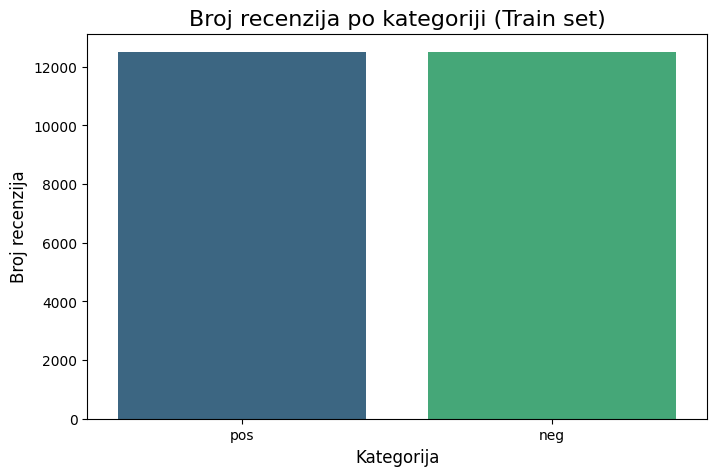

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Brojanje broja recenzija
base_dir = '/content/aclImdb/aclImdb/train'
categories = ['pos', 'neg']
counts = {}

for category in categories:
    dir_path = os.path.join(base_dir, category)
    counts[category] = len([fname for fname in os.listdir(dir_path) if fname.endswith('.txt')])

# Crtanje bar plot-a
plt.figure(figsize=(8, 5))
sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")
plt.title("Broj recenzija po kategoriji (Train set)", fontsize=16)
plt.xlabel("Kategorija", fontsize=12)
plt.ylabel("Broj recenzija", fontsize=12)
plt.xticks(fontsize=10)
plt.show()

/tmp/ipython-input-2643029824.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")


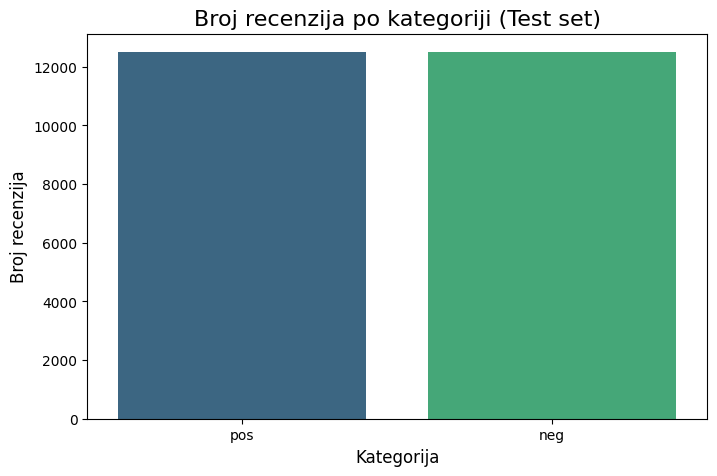

In [ ]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Brojanje broja recenzija
base_dir = '/content/aclImdb/aclImdb/test'
categories = ['pos', 'neg']
counts = {}

for category in categories:
    dir_path = os.path.join(base_dir, category)
    counts[category] = len([fname for fname in os.listdir(dir_path) if fname.endswith('.txt')])

# Crtanje bar plot-a
plt.figure(figsize=(8, 5))
sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette="viridis")
plt.title("Broj recenzija po kategoriji (Test set)", fontsize=16)
plt.xlabel("Kategorija", fontsize=12)
plt.ylabel("Broj recenzija", fontsize=12)
plt.xticks(fontsize=10)
plt.show()


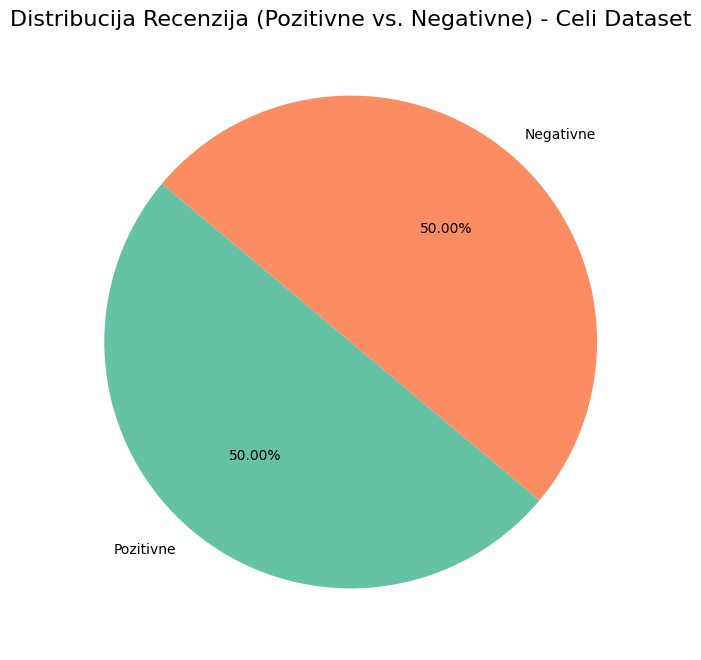

In [ ]:
base_dirs = ['/content/aclImdb/aclImdb/train', '/content/aclImdb/aclImdb/test']
categories = ['pos', 'neg']
counts = {'pos': 0, 'neg': 0}

for base in base_dirs:
    for category in categories:
        dir_path = os.path.join(base, category)
        counts[category] += len([fname for fname in os.listdir(dir_path) if fname.endswith('.txt')])

# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    counts.values(),
    labels=['Pozitivne', 'Negativne'],
    autopct='%0.2f%%',
    colors=['#66c2a5', '#fc8d62'],
    startangle=140
)
plt.title("Distribucija Recenzija (Pozitivne vs. Negativne) - Celi Dataset", fontsize=16)
plt.show()

In [ ]:
import os
import pandas as pd

# Definisanje baze direktorijuma
base_dirs = ['/content/aclImdb/aclImdb/train', '/content/aclImdb/aclImdb/test']
categories = ['pos', 'neg']

# Prazne liste
texts = []
labels = []

# Čitanje svih review-ova
for base in base_dirs:
    for category in categories:
        dir_path = os.path.join(base, category)
        for fname in os.listdir(dir_path):
            if fname.endswith('.txt'):
                with open(os.path.join(dir_path, fname), encoding='utf-8') as f:
                    texts.append(f.read())
                labels.append(1 if category == 'pos' else 0)

# Kreiranje DataFrame-a
df = pd.DataFrame({'review': texts, 'label': labels})

print(f'Dataset shape: {df.shape}')
df.head()

# Broj karaktera
df['num_characters'] = df['review'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)

# Broj reči
df['num_words'] = df['review'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)

# Broj rečenica
df['num_sentences'] = df['review'].apply(lambda x: len(str(x).split('.')) if pd.notnull(x) else 0)


print(df[['review', 'num_characters', 'num_words', 'num_sentences']].head())

Dataset shape: (50000, 2)
                                              review  num_characters  \
0  This is not the stuff of soap-operas but the s...             235   
1  Passport to Pimlico is a real treat for all fa...            3057   
2  It has been some years since I saw this, but r...            1572   
3  I have been an admirer of Edward Burtynsky's w...             878   
4  1933 seemed to be a great year for satires ("D...             750   

   num_words  num_sentences  
0         40              3  
1        504             13  
2        309             20  
3        148              6  
4        134              7  


In [ ]:
# Statistički opis
print("\nOpis broja karaktera:")
print(df['num_characters'].describe())

print("\nOpis broja reči:")
print(df['num_words'].describe())

print("\nOpis broja rečenica:")
print(df['num_sentences'].describe())


Opis broja karaktera:
count    50000.000000
mean      1309.431020
std        989.728014
min         32.000000
25%        699.000000
50%        970.000000
75%       1590.250000
max      13704.000000
Name: num_characters, dtype: float64

Opis broja reči:
count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: num_words, dtype: float64

Opis broja rečenica:
count    50000.000000
mean        14.010400
std          9.890968
min          1.000000
25%          8.000000
50%         11.000000
75%         17.000000
max        176.000000
Name: num_sentences, dtype: float64


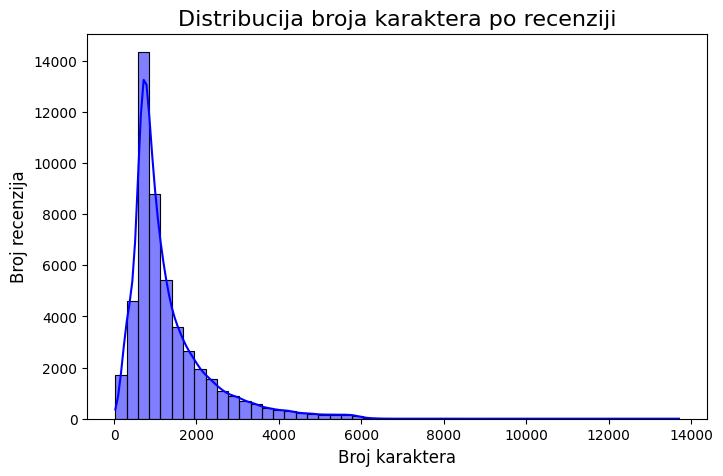

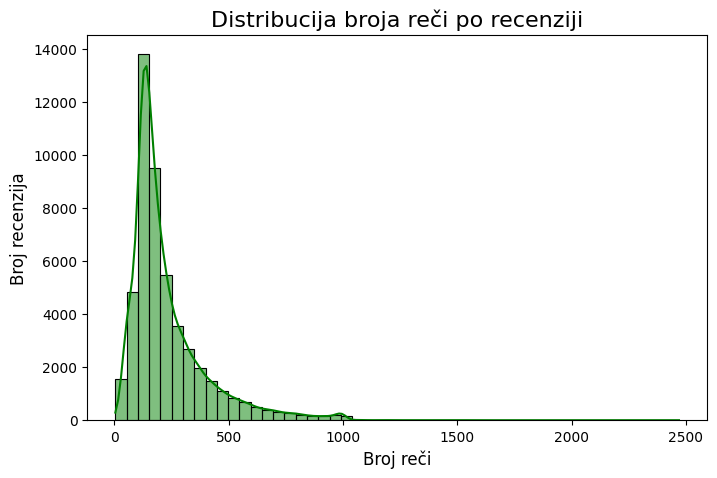

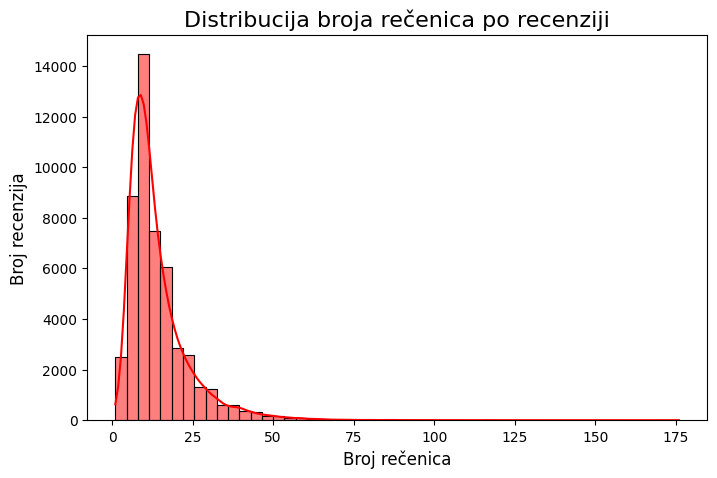

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Broj karaktera
plt.figure(figsize=(8,5))
sns.histplot(df['num_characters'], bins=50, kde=True, color='blue')
plt.title('Distribucija broja karaktera po recenziji', fontsize=16)
plt.xlabel('Broj karaktera', fontsize=12)
plt.ylabel('Broj recenzija', fontsize=12)
plt.show()

# Broj reči
plt.figure(figsize=(8,5))
sns.histplot(df['num_words'], bins=50, kde=True, color='green')
plt.title('Distribucija broja reči po recenziji', fontsize=16)
plt.xlabel('Broj reči', fontsize=12)
plt.ylabel('Broj recenzija', fontsize=12)
plt.show()

# Broj rečenica
plt.figure(figsize=(8,5))
sns.histplot(df['num_sentences'], bins=50, kde=True, color='red')
plt.title('Distribucija broja rečenica po recenziji', fontsize=16)
plt.xlabel('Broj rečenica', fontsize=12)
plt.ylabel('Broj recenzija', fontsize=12)
plt.show()

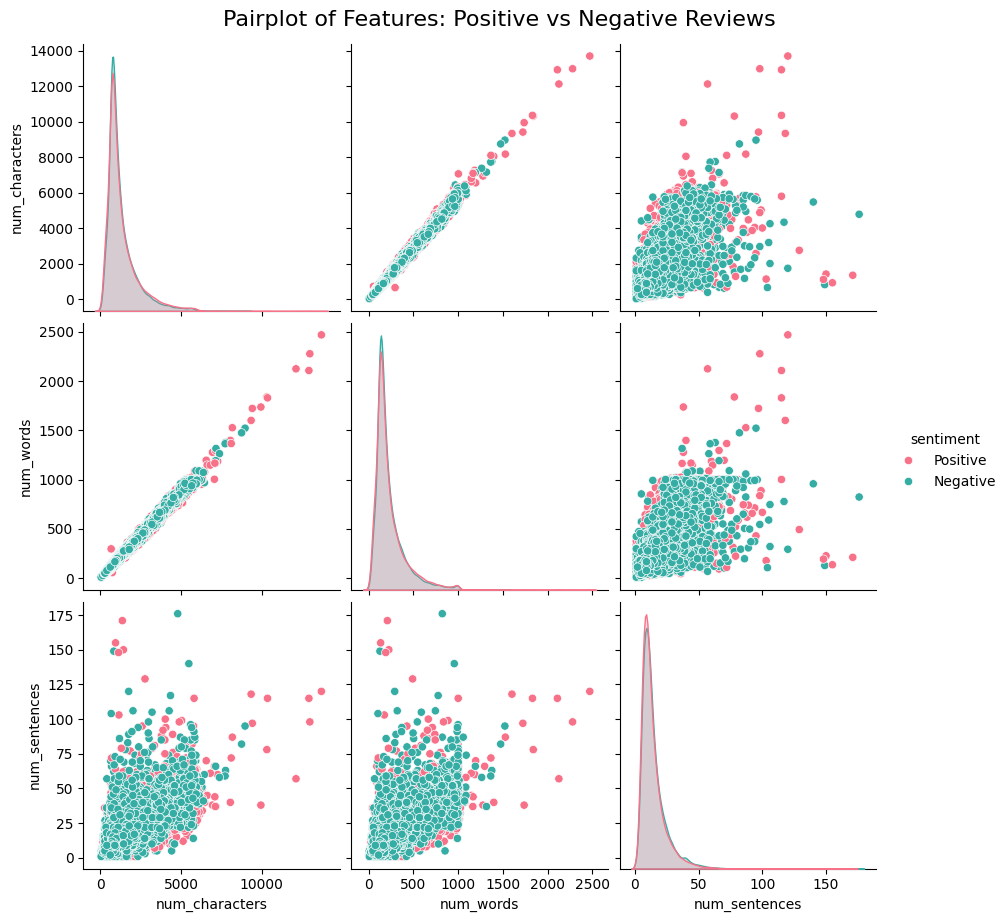

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Učitavanje svih review-ova iz train i test foldera
base_dirs = {
    'train': '/content/aclImdb/aclImdb/train',
    'test': '/content/aclImdb/aclImdb/test'
}
categories = ['pos', 'neg']

texts = []
labels = []

for dataset_type, base in base_dirs.items():
    for category in categories:
        dir_path = os.path.join(base, category)
        for fname in os.listdir(dir_path):
            if fname.endswith('.txt'):
                with open(os.path.join(dir_path, fname), encoding='utf-8') as f:
                    texts.append(f.read())
                labels.append(1 if category == 'pos' else 0)

# Kreiranje DataFrame-a
df = pd.DataFrame({'review': texts, 'label': labels})

# 2. Dodavanje novih kolona: broj karaktera, broj reči, broj rečenica
df['num_characters'] = df['review'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
df['num_words'] = df['review'].apply(lambda x: len(str(x).split()) if pd.notnull(x) else 0)
df['num_sentences'] = df['review'].apply(lambda x: len(str(x).split('.')) if pd.notnull(x) else 0)

# 3. Dodavanje tekstualne kolone za sentiment
df['sentiment'] = df['label'].apply(lambda x: 'Positive' if x == 1 else 'Negative')

# 4. Pairplot za Positive vs Negative recenzije
sns.pairplot(
    df,
    hue='sentiment',  # Positive vs Negative
    vars=['num_characters', 'num_words', 'num_sentences'],  # Numeričke kolone
    palette='husl',  # Šarena paleta boja
    height=3
)

plt.suptitle("Pairplot of Features: Positive vs Negative Reviews", y=1.02, fontsize=16)
plt.show()

In [ ]:
import re

def clean_text(text):
    text = text.lower()  # Mala slova
    text = re.sub(r'\d+', '', text)  # Izbaci brojeve
    text = re.sub(r'[^\w\s]', '', text)  # Izbaci interpunkciju
    text = re.sub(r'\s+', ' ', text).strip()  # Višestruki razmaci
    return text

import pandas as pd

df = pd.DataFrame({
    'text': texts,
    'label': labels
})



df['clean_text'] = df['text'].apply(clean_text)


df[['clean_text', 'label']].head()

,clean_text,label
0,this is not the stuff of soapoperas but the so...,1
1,passport to pimlico is a real treat for all fa...,1
2,it has been some years since i saw this but re...,1
3,i have been an admirer of edward burtynskys wo...,1
4,seemed to be a great year for satires duck sou...,1


In [ ]:
import os

# Lokacija podataka
base_dir = '/content/aclImdb/aclImdb'

train_texts = []
train_labels = []

test_texts = []
test_labels = []

# Train podaci
for label_type in ['pos', 'neg']:
    dir_name = os.path.join(base_dir, 'train', label_type)
    for fname in os.listdir(dir_name):
        if fname.endswith('.txt'):
            with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                train_texts.append(f.read())
            train_labels.append(1 if label_type == 'pos' else 0)

# Test podaci
for label_type in ['pos', 'neg']:
    dir_name = os.path.join(base_dir, 'test', label_type)
    for fname in os.listdir(dir_name):
        if fname.endswith('.txt'):
            with open(os.path.join(dir_name, fname), encoding='utf-8') as f:
                test_texts.append(f.read())
            test_labels.append(1 if label_type == 'pos' else 0)

print(f"Broj train primera: {len(train_texts)}")
print(f"Broj test primera: {len(test_texts)}")

Broj train primera: 25000
Broj test primera: 25000


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(max_features=5000)


X_train = vectorizer.fit_transform(train_texts)


X_test = vectorizer.transform(test_texts)


y_train = train_labels
y_test = test_labels

print(f"Veličina X_train: {X_train.shape}")
print(f"Veličina X_test: {X_test.shape}")

Veličina X_train: (25000, 5000)
Veličina X_test: (25000, 5000)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predikcija
y_pred = model.predict(X_test)

# Evaluacija
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.88264
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



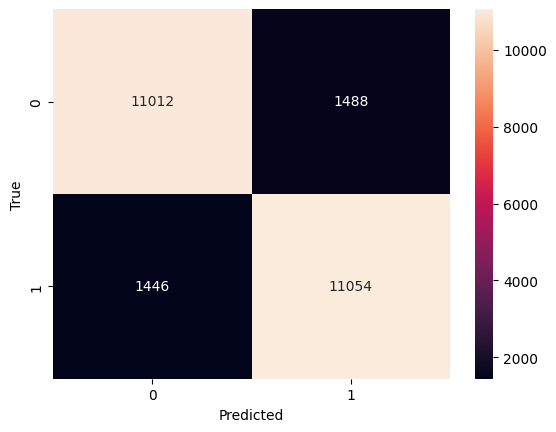

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
pip install --upgrade transformers


In [ ]:
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.encodings = tokenizer(
            texts,
            truncation=True,
            padding=True,
            max_length=max_len
        )
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(int(self.labels[idx]))
        return item


# ✅ Pretpostavlja se da već imaš train_texts, test_texts, y_train, y_test definisane
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

train_dataset = SentimentDataset(train_texts, y_train, tokenizer)
test_dataset = SentimentDataset(test_texts, y_test, tokenizer)

# 3️⃣ Model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# 4️⃣ Metod za računanje metrika
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# 5️⃣ Parametri za trening
training_args = TrainingArguments(
    output_dir='./results',
    do_train=True,
    do_eval=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    logging_dir='./logs'
)

# 6️⃣ Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics  # 👈 ovo dodaje accuracy i ostale metrike
)

# 7️⃣ Treniranje
trainer.train()

# 8️⃣ Evaluacija
results = trainer.evaluate()
print("Rezultati evaluacije:")
print(results)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3788882493.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,0.407000
1000,0.337200
1500,0.313400
2000,0.198600
2500,0.190500
3000,0.186800
3500,0.096400
4000,0.077500
4500,0.077100


Rezultati evaluacije:
{'eval_loss': 0.5321142673492432, 'eval_accuracy': 0.88624, 'eval_f1': 0.8862257281553398, 'eval_precision': 0.886433897072195, 'eval_recall': 0.88624, 'eval_runtime': 182.4056, 'eval_samples_per_second': 137.057, 'eval_steps_per_second': 8.569, 'epoch': 3.0}


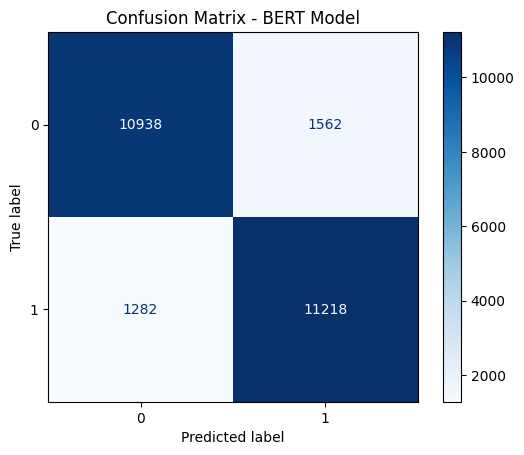

              precision    recall  f1-score   support

           0       0.90      0.88      0.88     12500
           1       0.88      0.90      0.89     12500

    accuracy                           0.89     25000
   macro avg       0.89      0.89      0.89     25000
weighted avg       0.89      0.89      0.89     25000



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Ako imaš rezultat od trainer.predict()
preds_output = trainer.predict(test_dataset)
y_true = preds_output.label_ids
y_pred = preds_output.predictions.argmax(axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - BERT Model")
plt.show()

# Detaljan report (precision, recall, f1)
print(classification_report(y_true, y_pred))


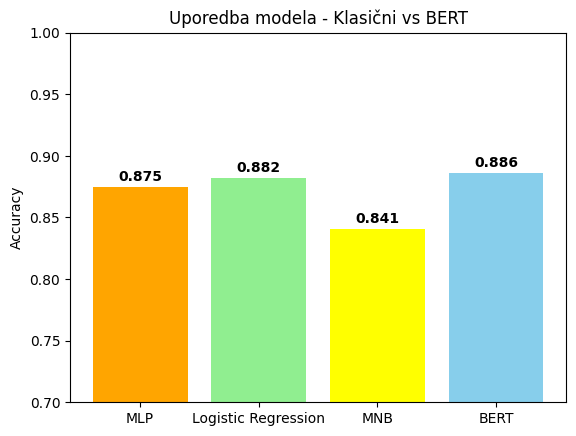

In [ ]:
import matplotlib.pyplot as plt

models = ["MLP", "Logistic Regression", "MNB", "BERT"]
accuracies = [0.875, 0.882, 0.8405, 0.886]

plt.bar(models, accuracies, color=["orange", "lightgreen", "yellow", "skyblue"])
plt.ylabel("Accuracy")
plt.title("Uporedba modela - Klasični vs BERT")
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center', fontweight='bold')
plt.ylim(0.7, 1.0)
plt.show()


DistilBert

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch

# ✅ 1. Učitavanje modela i tokenizatora
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# ✅ 2. Pretvaranje tvojih podataka u HuggingFace Dataset format
train_data = Dataset.from_dict({"text": train_texts, "label": y_train})
test_data = Dataset.from_dict({"text": test_texts, "label": y_test})

# ✅ 3. Tokenizacija
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True, max_length=256)

train_data = train_data.map(tokenize, batched=True, batch_size=len(train_data))
test_data = test_data.map(tokenize, batched=True, batch_size=len(test_data))

train_data.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_data.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# ✅ 4. Model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

# ✅ 5. Metričke funkcije
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

# ✅ 6. Parametri treninga
training_args = TrainingArguments(
    output_dir="./distilbert_results",
    do_train=True,
    do_eval=True,
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_dir='./logs',
)


# ✅ 7. Trener
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

# ✅ 8. Treniranje
trainer.train()

# ✅ 9. Evaluacija
results = trainer.evaluate()
print("📊 Rezultati DistilBERT modela:")
for key, value in results.items():
    print(f"{key}: {value:.4f}")

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-916828550.py:51: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.12/dist-packages/notebook/notebookapp.py:191: SyntaxWarning: invalid escape sequence '\/'
  | |_| | '_ \/ _` / _` |  _/ -_)


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: kelim-selmanovic (kelim-selmanovic-student) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Step,Training Loss
500,0.342700
1000,0.283200
1500,0.258900
2000,0.174400
2500,0.185800
3000,0.171300


📊 Rezultati DistilBERT modela:
eval_loss: 0.2597
eval_accuracy: 0.9138
eval_f1: 0.9139
eval_precision: 0.9130
eval_recall: 0.9148
eval_runtime: 167.8367
eval_samples_per_second: 148.9540
eval_steps_per_second: 9.3130
epoch: 2.0000


RoBert

In [ ]:
# ✅ 1. Importi
import torch
from torch.utils.data import Dataset
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# ✅ 2. Dataset klasa
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.encodings = tokenizer(
            texts,
            truncation=True,
            padding=True,
            max_length=max_len
        )
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(int(self.labels[idx]))
        return item


# ✅ 3. Tokenizer i dataset
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

train_dataset = SentimentDataset(train_texts, y_train, tokenizer)
test_dataset = SentimentDataset(test_texts, y_test, tokenizer)


# ✅ 4. Model
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2)


# ✅ 5. Metrike
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }


# ✅ 6. Parametri treninga (verzija bez evaluation_strategy)
training_args = TrainingArguments(
    output_dir="./roberta_results",
    do_train=True,
    do_eval=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    logging_dir="./roberta_logs"
)


# ✅ 7. Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


# ✅ 8. Treniranje
trainer.train()


# ✅ 9. Evaluacija
results = trainer.evaluate()
print("📊 Rezultati RoBERTa:")
for k, v in results.items():
    print(f"{k}: {v:.4f}")


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-3510562880.py:65: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
500,0.401700
1000,0.356900
1500,0.309100
2000,0.224600
2500,0.221900
3000,0.202500


📊 Rezultati RoBERTa:
eval_loss: 0.2975
eval_accuracy: 0.9041
eval_f1: 0.9041
eval_precision: 0.9042
eval_recall: 0.9041
eval_runtime: 174.2662
eval_samples_per_second: 143.4590
eval_steps_per_second: 8.9690
epoch: 2.0000


CONFUSION MATRIX-ROBERT

📊 Confusion Matrix:
[[11231  1269]
 [ 1128 11372]]


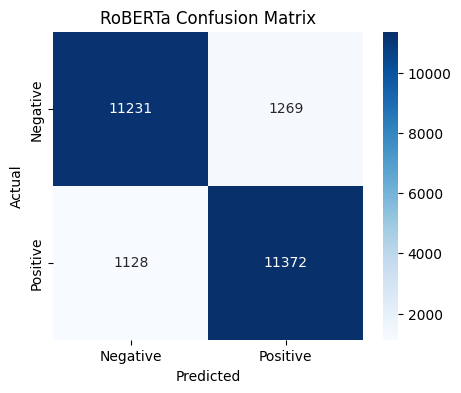

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Dobij predikcije na test setu
predictions_output = trainer.predict(test_dataset)
preds = np.argmax(predictions_output.predictions, axis=1)
labels = predictions_output.label_ids

# 2. Confusion matrix
cm = confusion_matrix(labels, preds)
print("📊 Confusion Matrix:")
print(cm)

# 3. Vizualizacija
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"],
            yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("RoBERTa Confusion Matrix")
plt.show()


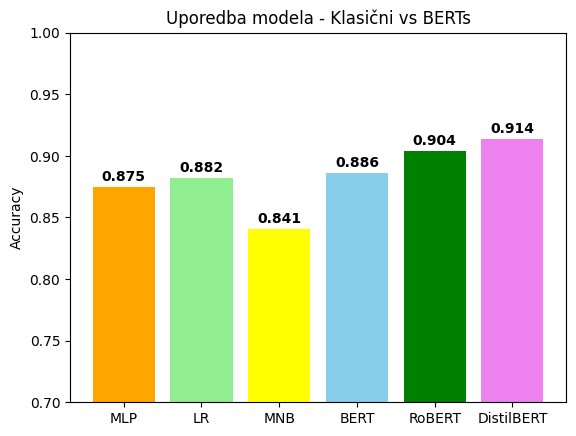

In [ ]:
import matplotlib.pyplot as plt

models = ["MLP", "LR", "MNB", "BERT", "RoBERT", "DistilBERT"]
accuracies = [0.875, 0.882, 0.8405, 0.886, 0.904, 0.914]

plt.bar(models, accuracies, color=["orange", "lightgreen", "yellow", "skyblue", "green", "violet"])
plt.ylabel("Accuracy")
plt.title("Uporedba modela - Klasični vs BERTs")
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.3f}", ha='center', fontweight='bold')
plt.ylim(0.7, 1.0)
plt.show()

HUGGIN FACE

In [ ]:
!pip install -q transformers datasets huggingface_hub
from huggingface_hub import login

# 🔐 Unesi tvoj token (npr. "hf_abcd123...")
login("")


UPLOAD NA HUGGING FACE

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from huggingface_hub import HfApi

model_path = "./best_distilbert_model"

# Učitaj lokalni model i tokenizer
model = AutoModelForSequenceClassification.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Uploaduj na Hugging Face
model.push_to_hub("klm1337/distilbert-sentiment-model")
tokenizer.push_to_hub("klm1337/distilbert-sentiment-model")

Processing Files (0 / 0)      : |          |  0.00B /  0.00B            

New Data Upload               : |          |  0.00B /  0.00B            

  ...dy86s0s/model.safetensors:   0%|          |  568kB /  499MB            

README.md: 0.00B [00:00, ?B/s]

CommitInfo(commit_url='https://huggingface.co/klm1337/distilbert-sentiment-model/commit/3dc0ee046b48313b07068e2ca224fbcf606ad184', commit_message='Upload tokenizer', commit_description='', oid='3dc0ee046b48313b07068e2ca224fbcf606ad184', pr_url=None, repo_url=RepoUrl('https://huggingface.co/klm1337/distilbert-sentiment-model', endpoint='https://huggingface.co', repo_type='model', repo_id='klm1337/distilbert-sentiment-model'), pr_revision=None, pr_num=None)

TEST NA MODELU DISTIL BERT

In [ ]:
from transformers import pipeline

model_name = "klm1337/distilbert-sentiment-model"
classifier = pipeline("text-classification", model=model_name)

print(classifier("I hated every minute of this movie. The acting was terrible and the plot was boring!"))
print(classifier("Very traumatic movie but very good, congratulations"))


Device set to use cuda:0


[{'label': 'LABEL_0', 'score': 0.9983755350112915}]
[{'label': 'LABEL_1', 'score': 0.9959496259689331}]
